In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import warnings
import pandas as pd
import numpy as np



In [2]:
df=pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:

df.rename(columns= {"v1":"Target", "v2":"Text"}, inplace=True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

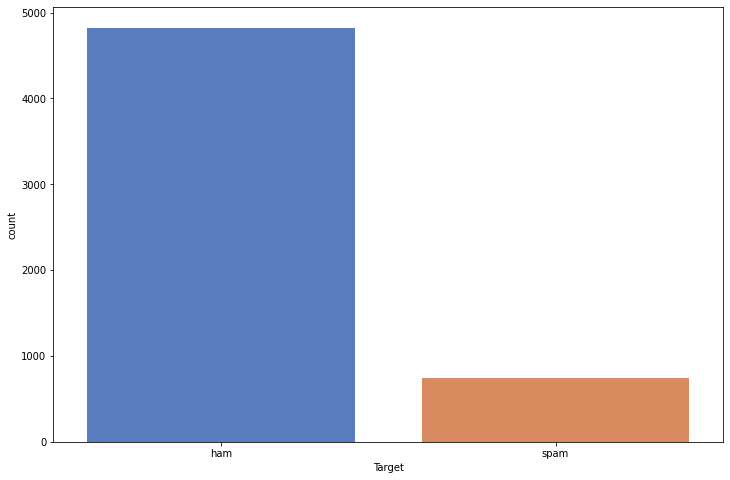

In [7]:
plt.figure(figsize=(12,8))
pt=sns.countplot(x=df.Target,palette="muted")

In [8]:
import nltk

df['No_of_Characters']=df.Text.apply(len)
df['No_of_Words']=df.apply(lambda row: nltk.word_tokenize(row['Text']),axis=1).apply(len)
df['No_of_Sentences']=df.apply(lambda row: nltk.sent_tokenize(row['Text']),axis=1).apply(len)
df.head()

,Target,Text,No_of_Characters,No_of_Words,No_of_Sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [9]:
df.describe()

,No_of_Characters,No_of_Words,No_of_Sentences
count,5572.000000,5572.000000,5572.000000
mean,80.058327,18.502692,1.993001
std,59.623937,13.638372,1.503584
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,121.000000,27.000000,2.000000
max,910.000000,219.000000,38.000000


<Figure size 864x576 with 0 Axes>

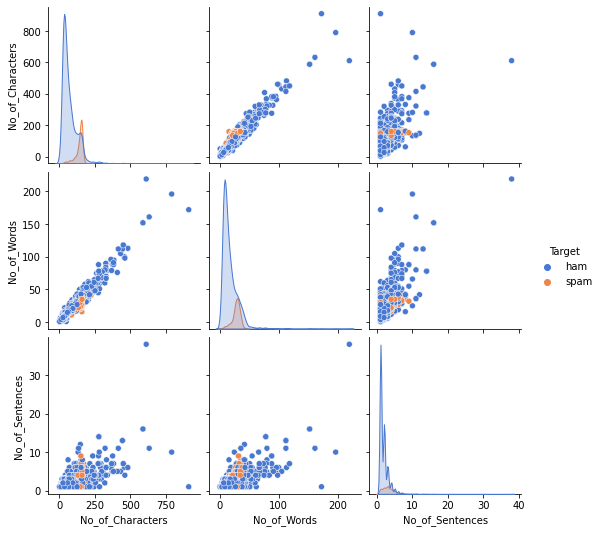

In [10]:
plt.figure(figsize=(12,8))
sns.pairplot(data=df,hue="Target",palette="muted")
plt.show()

In [11]:
df=df[df["No_of_Characters"]<350]
df.shape

(5548, 5)

<Figure size 864x576 with 0 Axes>

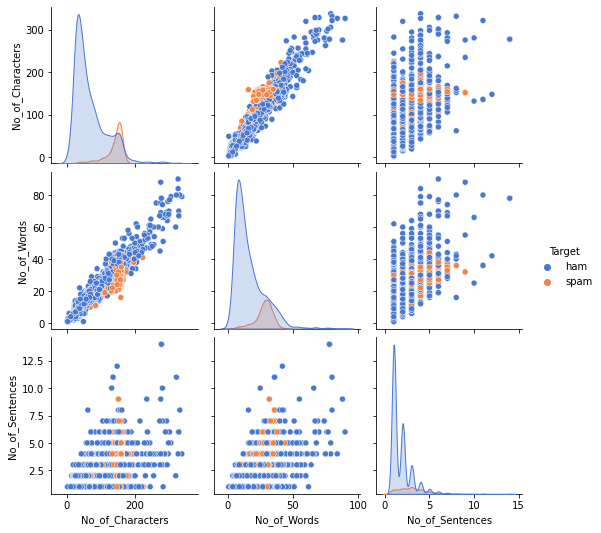

In [12]:
plt.figure(figsize=(12,8))
sns.pairplot(data=df,hue="Target",palette="muted")
plt.show()

In [13]:
print("The First 5 Texts:",*df["Text"][:5],sep="\n")

The First 5 Texts:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [14]:
import re

In [15]:
def Clean(Text):
    cl=re.sub('[^a-zA-Z]',' ',Text)
    cl=cl.lower()
    cl=cl.split()
    cl=' '.join(cl)
    return cl
df['df1']=df["Text"].apply(Clean)
print(*df["df1"][:5],sep="\n")
    

go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though


In [16]:
df['Tokenize_Text']=df.apply(lambda row: nltk.word_tokenize(row["df1"]),axis=1)
print(*df['Tokenize_Text'][:5],sep='\n')

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'to', 'to', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', 'over', 's']
['u', 'dun', 'say', 'so', 'early', 'hor', 'u', 'c', 'already', 'then', 'say']
['nah', 'i', 'don', 't', 'think', 'he', 'goes', 'to', 'usf', 'he', 'lives', 'around', 'here', 'though']


In [17]:
from nltk.corpus import stopwords

In [18]:
def remove_stopwords(text):
    stop_words= set(stopwords.words("english"))
    filtered_text=[word for word in text if word not in stop_words]
    return filtered_text

In [19]:
df["No_stopwords"]=df['Tokenize_Text'].apply(remove_stopwords)
print(*df["No_stopwords"][:5],sep='\n')

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']


In [20]:
from nltk.stem import WordNetLemmatizer
lemmatizer= WordNetLemmatizer()
def lemmatize_word(text):
    lemmas=[lemmatizer.lemmatize(word,pos='v') for word in text]
    return lemmas
df['Lemmatized_Text']=df['No_stopwords'].apply(lemmatize_word)
print(*df['Lemmatized_Text'][:5],sep='\n')

['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'live', 'around', 'though']


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
corpus=[]
for i in df['Lemmatized_Text']:
    txt=' '.join([row for row in i])
    corpus.append(txt)
print(*corpus[:5],sep='\n')

go jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joke wif u oni
free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply
u dun say early hor u c already say
nah think go usf live around though


In [23]:
tf=TfidfVectorizer()
X=tf.fit_transform(corpus).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
X.dtype

dtype('float64')

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
LE=LabelEncoder()
df.Target=LE.fit_transform(df.Target)


In [27]:
y=df.Target

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [30]:
classifiers=[MultinomialNB(),
             RandomForestClassifier(),
             KNeighborsClassifier(),
             SVC()]
for model in classifiers:
    model.fit(X_train, y_train)
dict= {0: "NaiveBayes",1: "RandomForest",2:"KNeighbors",3:"SVC"}
    

In [31]:
for i,model in enumerate(classifiers):
    cv=cross_val_score(model,X_train,y_train,scoring="accuracy",cv=10)
    print(dict[i],cv.mean())

NaiveBayes 0.9634332017067286
RandomForest 0.975793734926987
KNeighbors 0.90471205576021
SVC 0.9752795961095062
